<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/NU/Attenuation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attenuation coefficients

Evgeny Kolonsky, Oct 2024

v0.1.1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

#Reference data

https://physics.nist.gov/PhysRefData/XrayMassCoef/tab3.html

In [130]:
NIST = {
    'Al':  '''
#     Energy       μ/ρ        μen/ρ
#      (MeV)      (cm2/g)     (cm2/g)
#____________________________________
#
   1.00000E-03  1.185E+03  1.183E+03
   1.50000E-03  4.022E+02  4.001E+02
   1.55960E-03  3.621E+02  3.600E+02
   1.55960E-03  3.957E+03  3.829E+03
   2.00000E-03  2.263E+03  2.204E+03
   3.00000E-03  7.880E+02  7.732E+02
   4.00000E-03  3.605E+02  3.545E+02
   5.00000E-03  1.934E+02  1.902E+02
   6.00000E-03  1.153E+02  1.133E+02
   8.00000E-03  5.033E+01  4.918E+01
   1.00000E-02  2.623E+01  2.543E+01
   1.50000E-02  7.955E+00  7.487E+00
   2.00000E-02  3.441E+00  3.094E+00
   3.00000E-02  1.128E+00  8.778E-01
   4.00000E-02  5.685E-01  3.601E-01
   5.00000E-02  3.681E-01  1.840E-01
   6.00000E-02  2.778E-01  1.099E-01
   8.00000E-02  2.018E-01  5.511E-02
   1.00000E-01  1.704E-01  3.794E-02
   1.50000E-01  1.378E-01  2.827E-02
   2.00000E-01  1.223E-01  2.745E-02
   3.00000E-01  1.042E-01  2.816E-02
   4.00000E-01  9.276E-02  2.862E-02
   5.00000E-01  8.445E-02  2.868E-02
   6.00000E-01  7.802E-02  2.851E-02
   8.00000E-01  6.841E-02  2.778E-02
   1.00000E+00  6.146E-02  2.686E-02
   1.25000E+00  5.496E-02  2.565E-02
   1.50000E+00  5.006E-02  2.451E-02
   2.00000E+00  4.324E-02  2.266E-02
   3.00000E+00  3.541E-02  2.024E-02
   4.00000E+00  3.106E-02  1.882E-02
   5.00000E+00  2.836E-02  1.795E-02
   6.00000E+00  2.655E-02  1.739E-02
   8.00000E+00  2.437E-02  1.678E-02
   1.00000E+01  2.318E-02  1.650E-02
   1.50000E+01  2.195E-02  1.631E-02
   2.00000E+01  2.168E-02  1.633E-02
''',

'Ni': '''
#Energy       μ/ρ        μen/ρ
#      (MeV)      (cm2/g)     (cm2/g)
#____________________________________
#
   1.00000E-03  9.855E+03  9.797E+03
   1.00404E-03  9.753E+03  9.697E+03
   1.00810E-03  9.654E+03  9.598E+03
   1.00810E-03  1.099E+04  1.093E+04
   1.50000E-03  4.234E+03  4.214E+03
   2.00000E-03  2.049E+03  2.039E+03
   3.00000E-03  7.094E+02  7.042E+02
   4.00000E-03  3.282E+02  3.244E+02
   5.00000E-03  1.793E+02  1.761E+02
   6.00000E-03  1.090E+02  1.064E+02
   8.00000E-03  4.952E+01  4.758E+01
   8.33280E-03  4.428E+01  4.242E+01
   8.33280E-03  3.294E+02  2.240E+02
   1.00000E-02  2.090E+02  1.524E+02
   1.50000E-02  7.081E+01  5.734E+01
   2.00000E-02  3.220E+01  2.722E+01
   3.00000E-02  1.034E+01  8.982E+00
   4.00000E-02  4.600E+00  3.967E+00
   5.00000E-02  2.474E+00  2.078E+00
   6.00000E-02  1.512E+00  1.219E+00
   8.00000E-02  7.306E-01  5.259E-01
   1.00000E-01  4.440E-01  2.781E-01
   1.50000E-01  2.208E-01  9.812E-02
   2.00000E-01  1.582E-01  5.649E-02
   3.00000E-01  1.154E-01  3.659E-02
   4.00000E-01  9.765E-02  3.209E-02
   5.00000E-01  8.698E-02  3.036E-02
   6.00000E-01  7.944E-02  2.937E-02
   8.00000E-01  6.891E-02  2.795E-02
   1.00000E+00  6.160E-02  2.674E-02
   1.25000E+00  5.494E-02  2.536E-02
   1.50000E+00  5.015E-02  2.420E-02
   2.00000E+00  4.387E-02  2.257E-02
   3.00000E+00  3.745E-02  2.107E-02
   4.00000E+00  3.444E-02  2.066E-02
   5.00000E+00  3.289E-02  2.070E-02
   6.00000E+00  3.210E-02  2.094E-02
   8.00000E+00  3.164E-02  2.163E-02
   1.00000E+01  3.185E-02  2.234E-02
   1.50000E+01  3.320E-02  2.368E-02
   2.00000E+01  3.476E-02  2.446E-02
''',

'Pb': '''
#Energy       μ/ρ        μen/ρ
#      (MeV)      (cm2/g)     (cm2/g)
#____________________________________
#
   1.00000E-03  5.210E+03  5.197E+03
   1.50000E-03  2.356E+03  2.344E+03
   2.00000E-03  1.285E+03  1.274E+03
   2.48400E-03  8.006E+02  7.895E+02
   2.48400E-03  1.397E+03  1.366E+03
   2.53429E-03  1.726E+03  1.682E+03
   2.58560E-03  1.944E+03  1.895E+03
   2.58560E-03  2.458E+03  2.390E+03
   3.00000E-03  1.965E+03  1.913E+03
   3.06640E-03  1.857E+03  1.808E+03
   3.06640E-03  2.146E+03  2.090E+03
   3.30130E-03  1.796E+03  1.748E+03
   3.55420E-03  1.496E+03  1.459E+03
   3.55420E-03  1.585E+03  1.546E+03
   3.69948E-03  1.442E+03  1.405E+03
   3.85070E-03  1.311E+03  1.279E+03
   3.85070E-03  1.368E+03  1.335E+03
   4.00000E-03  1.251E+03  1.221E+03
   5.00000E-03  7.304E+02  7.124E+02
   6.00000E-03  4.672E+02  4.546E+02
   8.00000E-03  2.287E+02  2.207E+02
   1.00000E-02  1.306E+02  1.247E+02
   1.30352E-02  6.701E+01  6.270E+01
   1.30352E-02  1.621E+02  1.291E+02
   1.50000E-02  1.116E+02  9.100E+01
   1.52000E-02  1.078E+02  8.807E+01
   1.52000E-02  1.485E+02  1.131E+02
   1.55269E-02  1.416E+02  1.083E+02
   1.58608E-02  1.344E+02  1.032E+02
   1.58608E-02  1.548E+02  1.180E+02
   2.00000E-02  8.636E+01  6.899E+01
   3.00000E-02  3.032E+01  2.536E+01
   4.00000E-02  1.436E+01  1.211E+01
   5.00000E-02  8.041E+00  6.740E+00
   6.00000E-02  5.021E+00  4.149E+00
   8.00000E-02  2.419E+00  1.916E+00
   8.80045E-02  1.910E+00  1.482E+00
   8.80045E-02  7.683E+00  2.160E+00
   1.00000E-01  5.549E+00  1.976E+00
   1.50000E-01  2.014E+00  1.056E+00
   2.00000E-01  9.985E-01  5.870E-01
   3.00000E-01  4.031E-01  2.455E-01
   4.00000E-01  2.323E-01  1.370E-01
   5.00000E-01  1.614E-01  9.128E-02
   6.00000E-01  1.248E-01  6.819E-02
   8.00000E-01  8.870E-02  4.644E-02
   1.00000E+00  7.102E-02  3.654E-02
   1.25000E+00  5.876E-02  2.988E-02
   1.50000E+00  5.222E-02  2.640E-02
   2.00000E+00  4.606E-02  2.360E-02
   3.00000E+00  4.234E-02  2.322E-02
   4.00000E+00  4.197E-02  2.449E-02
   5.00000E+00  4.272E-02  2.600E-02
   6.00000E+00  4.391E-02  2.744E-02
   8.00000E+00  4.675E-02  2.989E-02
   1.00000E+01  4.972E-02  3.181E-02
   1.50000E+01  5.658E-02  3.478E-02
   2.00000E+01  6.206E-02  3.595E-02
'''    }

def get_Emu(material):
  E_, murho_, muen_ =  np.genfromtxt(NIST[material].splitlines(), unpack=True)
  return E_, murho_

get_Emu('Al')
get_Emu('Ni')
get_Emu('Pb');


In [129]:
# prompt: find interval of E to which energy belongs

def mu_interpolate(energy, material):
  ans = []
  E_, mu_ = get_Emu(material)
  for en in energy:
    for i in range(len(E_) - 1):
      if en < E_[i+1] and en >= E_[i]:
        break
    dmu = mu_[i+1] - mu_[i]
    dE  = E_[i+1] - E_[i]
    mu_interpolated = mu_[i] + dmu * (en - E_[i]) / dE
    ans.append(mu_interpolated)
  return np.array(ans)


# Example usage
get_Emu('Al')
energy_value = 0.7  # Replace with the desired energy value
material_name = 'Al' # Replace with material name

ans = mu_interpolate([energy_value], material_name)
print(ans)

mu_interpolate(np.array([ 2e-3, 0.763]), material='Al')

[0.073215]


array([2.263000e+03, 7.018785e-02])

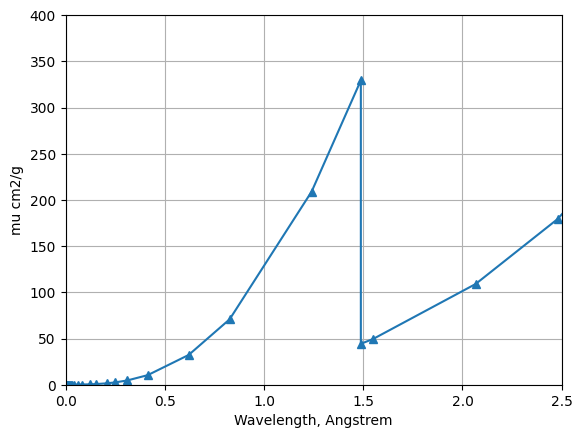

In [4]:
E, mu = get_Emu('Ni')
l = 12.398e-3 / E

plt.plot(l, mu, '-^')
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Wavelength, Angstrem')
plt.xlim(0, 2.5)
plt.ylim(0, 400)
plt.ylabel('mu cm2/g')
plt.grid()
plt.show()

*Elements of X-Ray Diffraction:*
B.D. Cullity S.R. Stock
Third Edition, p.12

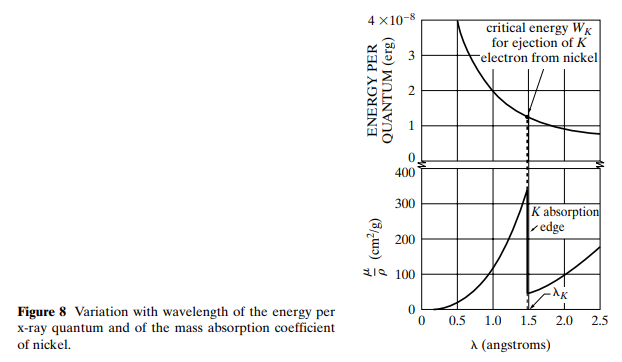

# $\beta$-decay energy spectrum

<img src='https://upload.wikimedia.org/wikipedia/commons/e/e6/Beta_spectrum_of_RaE.jpg' width=300>

approximation by linear dependence

$$
\frac{I}{I_{max}} + \frac{E}{E_{max}} = 1
$$

Text(0, 0.5, 'I, a.u.')

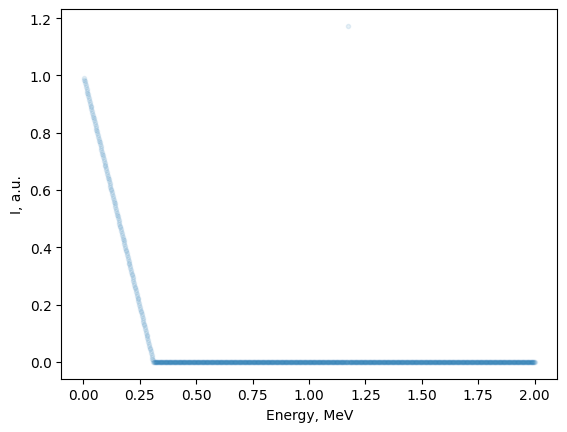

In [201]:
# initial approximation by linear
EMAX = 2.0 # MeV
EMIN = 2.5e-3 #MeV
N = 1000
Espace = np.linspace(EMIN, EMAX, N)
weights = np.diff(Espace, append=0)


def zero_spectrum():
  I = Espace * 0
  return I

def beta_spectrum(Emax):
  I  = zero_spectrum()
  I =  (1 - Espace / Emax)
  I[I < 0] = 0
  return I

# delta-function
def gamma_spectrum(Energy):
  I  = zero_spectrum()
  index = np.argmin(np.abs(np.array(Espace)-Energy))
  I[index] =  Energy
  return I


beta_Emax = 0.31
gamma_Energy = 1.173
I = beta_spectrum(beta_Emax) + gamma_spectrum(gamma_Energy)
plt.plot(Espace, I, '.', alpha=0.1)
plt.xlabel('Energy, MeV')
plt.ylabel('I, a.u.')
#plt.xscale('log')
#plt.yscale('log')



# Cobalt-60 vs Pb




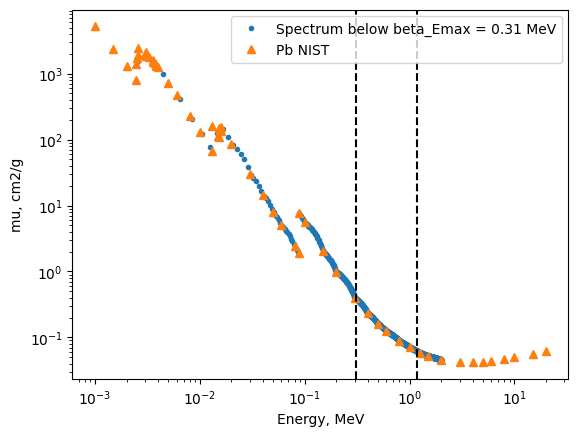

In [202]:
# Cobalt-60
beta_Emax = 0.31 # MeV, Cobalt-60 beta-decay maximum
gamma_Energy = 1.173 # # MeV, Cobalt-60 gamma-decay

material = 'Pb'
depth_max = 1.75 #cm
rho = 11.35 # g/cm3

I0 = zero_spectrum()
#I0 += beta_spectrum(beta_Emax)
I0 += gamma_spectrum(gamma_Energy)
I0 /= np.sum(I0)


mu_spectrum = mu_interpolate(Espace, material=material)
plt.plot(Espace, mu_spectrum, '.', label=f'Spectrum below {beta_Emax = } MeV')

# Reference data
E, mu = get_Emu(material)
plt.plot(E, mu, '^', label=f'{material} NIST')

plt.xlabel('Energy, MeV')
plt.ylabel('mu, cm2/g')
plt.legend()

plt.axvline(beta_Emax, ymin=0, ymax=1, color='k', linestyle='--')
plt.axvline(gamma_Energy, ymin=0, ymax=1, color='k', linestyle='--')
plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, 'Intensity spectrum, a.u.')

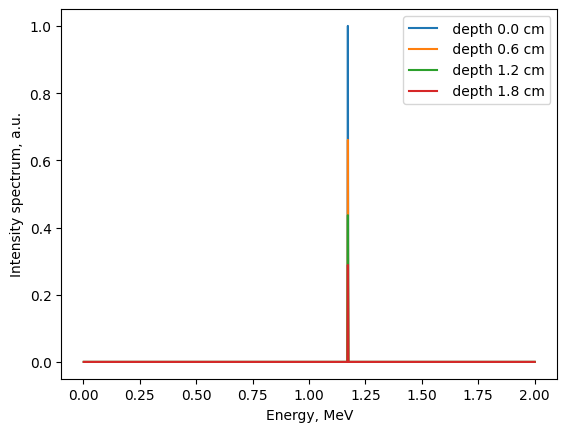

In [203]:
for depth in np.linspace(0, depth_max, 4):
  i_spectrum = I0 * np.exp(- mu_spectrum * depth * rho)
  plt.plot(Espace, i_spectrum, label=f' depth {depth:.1f} cm')

plt.legend()
plt.xlabel('Energy, MeV')
plt.ylabel('Intensity spectrum, a.u.')


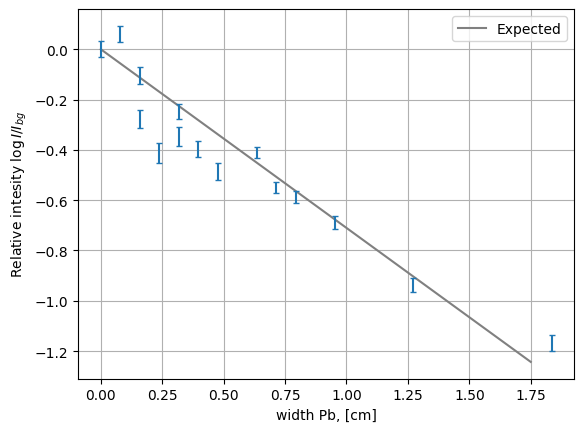

In [204]:
total_i = np.array([])
depths = np.linspace(0, depth_max, 4)
for depth in depths:
  s = np.sum(I0 * np.exp(- mu_spectrum * depth * rho) )
  total_i = np.append(total_i, s )

total_i /= total_i[0]
plt.plot(depths, np.log(total_i), color='gray', label='Expected')

# station 4
# Co-60_3
# sample 2
# shelf 3
# Pb plates
URL = 'https://raw.githubusercontent.com/tphlabs/data/main/Lab4_Nuclear/2023_12_28/'
for num in [3]:
  filename = f'Co-60_{num}.txt'
  data = np.genfromtxt( URL+filename)
  d, time, counts = data.T
  d *= 1e-4 # um -> cm
  delta = 1/np.sqrt(counts) # relative error
  I = counts / time
  I_rel = I / I[0] # relative
  I_err = delta * I_rel
  log_I_rel = I_err / I_rel # error of log

  plt.errorbar(d, np.log(I_rel), yerr=log_I_rel, linestyle='', capsize=2)

plt.xlabel(f'width {material}, [cm]')
plt.ylabel(r'Relative intesity $\log I/I_{bg}$')
plt.grid()

plt.legend()

#Th-204 vs Al

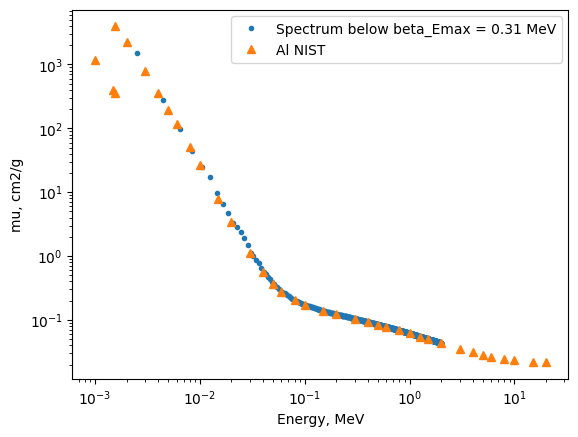

In [206]:
# Thallium-204
material = 'Al'
depth_max = 0.1 #cm
rho = 2.7 # g/cm3

I0 = zero_spectrum()
I0 += beta_spectrum(0.763) * 0.97
I0 += beta_spectrum(0.344) * 0.03


mu_spectrum = mu_interpolate(Espace, material=material)
plt.plot(Espace, mu_spectrum, '.', label=f'Spectrum below {beta_Emax = } MeV')

# Reference data
E, mu = get_Emu(material)
plt.plot(E, mu, '^', label=f'{material} NIST')

plt.xlabel('Energy, MeV')
plt.ylabel('mu, cm2/g')
plt.legend()

plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, 'I, a.u.')

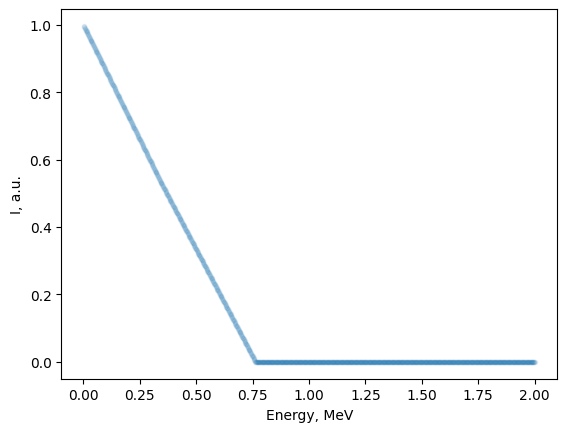

In [207]:
plt.plot(Espace, I0, '.', alpha=0.1)
plt.xlabel('Energy, MeV')
plt.ylabel('I, a.u.')
#plt.xscale('log')
#plt.yscale('log')

Text(0, 0.5, 'Intensity spectrum, a.u.')

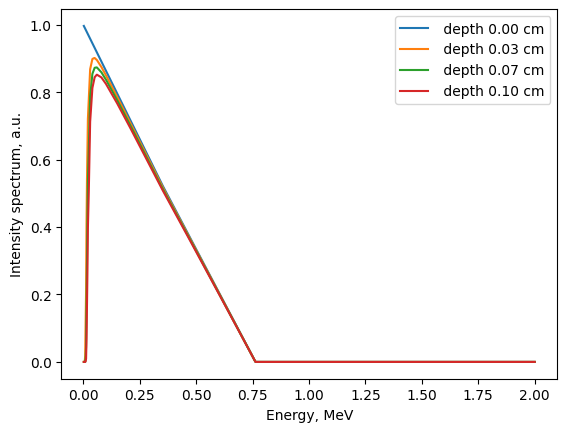

In [208]:
for depth in np.linspace(0, depth_max, 4):
  i_spectrum = I0 * np.exp(-mu_spectrum * depth * rho)
  plt.plot(Espace, i_spectrum, label=f' depth {depth:.2f} cm')

plt.legend()
plt.xlabel('Energy, MeV')
plt.ylabel('Intensity spectrum, a.u.')


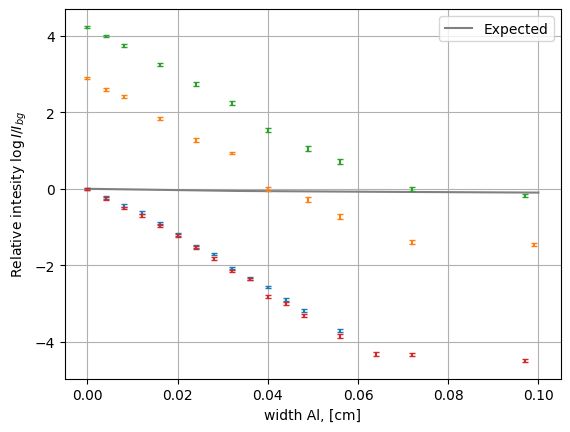

In [209]:
total_i = np.array([])
depths = np.linspace(0, depth_max, 4)
for depth in depths:
  s = np.sum(I0 * np.exp(- mu_spectrum * depth * rho) )
  total_i = np.append(total_i, s )

total_i /= total_i[0]
plt.plot(depths, np.log(total_i), color='gray', label='Expected')

URL = 'https://raw.githubusercontent.com/tphlabs/data/main/Lab4_Nuclear/2023_12_28/'

for num in [2, 3, 5, 7]:
  filename = f'Tl-204_{num}.txt'
  d, counts, time = np.genfromtxt( URL + filename, unpack=True)

  # sort by d
  idx = np.argsort(d)


  d = d * 1e-1 # mm -> cm
  delta = 1/np.sqrt(counts) # relative error
  I = counts / time
  I_rel = I / I[0] # relative
  I_err = delta * I_rel
  log_I_rel = I_err / I_rel # error of log

  plt.errorbar(d, np.log(I_rel), capsize=2, yerr=log_I_rel, linestyle='')

plt.xlabel('width Al, [cm]')
plt.ylabel(r'Relative intesity $\log I/I_{bg}$')
plt.grid()
plt.legend()


#Strontium-90 vs. Al

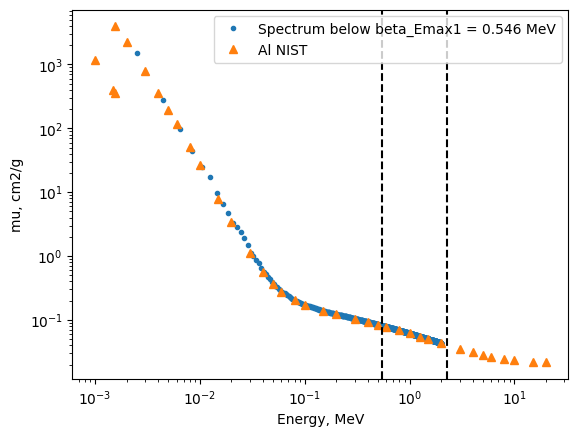

In [212]:
beta_Emax1 = 0.546 # MeV, beta-decay maximum
beta_Emax2 = 2.3 # MeV, beta-decay maximum
material = 'Al'
depth_max = 0.6 #cm
rho = 2.7 # g/cm3

I0 = zero_spectrum()
I0 += beta_spectrum(beta_Emax1)
#I0 += beta_spectrum(beta_Emax2)
I0 /= np.sum(I0) # normalize

mu_spectrum = mu_interpolate(Espace, material=material)
plt.plot(Espace, mu_spectrum, '.', label=f'Spectrum below {beta_Emax1 = } MeV')

# Reference data
E, mu = get_Emu(material)
plt.plot(E, mu, '^', label=f'{material} NIST')

plt.xlabel('Energy, MeV')
plt.ylabel('mu, cm2/g')
plt.legend()

plt.axvline(beta_Emax1, ymin=0, ymax=1, color='k', linestyle='--')
plt.axvline(beta_Emax2, ymin=0, ymax=1, color='k', linestyle='--')
plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, 'Intensity spectrum, a.u.')

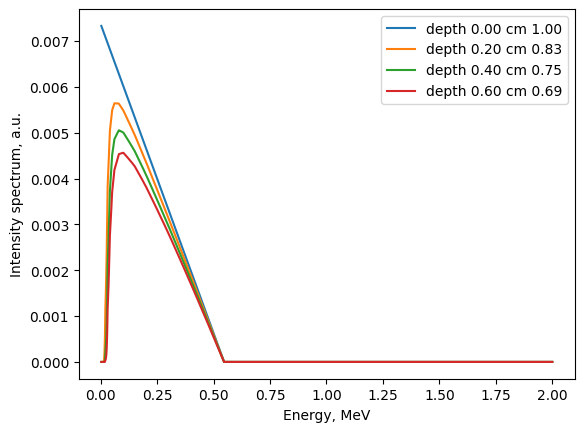

In [213]:
for depth in np.linspace(0, depth_max, 4):
  i_spectrum = I0 * np.exp(-mu_spectrum * depth * rho)
  plt.plot(Espace, i_spectrum, label=f'depth {depth:.2f} cm {np.sum(i_spectrum):.2f}')

plt.legend()
plt.xlabel('Energy, MeV')
plt.ylabel('Intensity spectrum, a.u.')

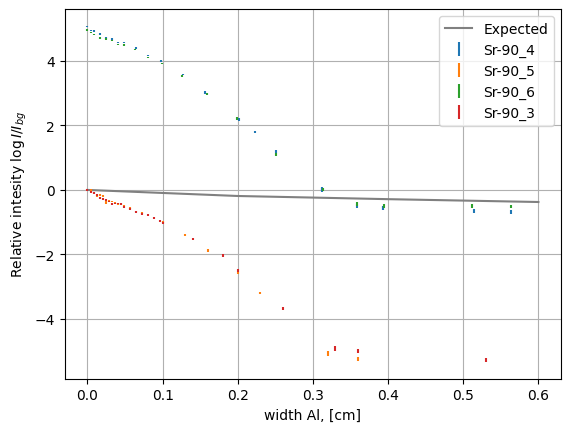

In [214]:
total_i = np.array([])
depths = np.linspace(0, depth_max, 4)
for depth in depths:
  s = np.sum(I0 * np.exp(- mu_spectrum * depth * rho) )
  total_i = np.append(total_i, s )

total_i /= total_i[0]
plt.plot(depths, np.log(total_i), color='gray', label='Expected')

URL = 'https://raw.githubusercontent.com/tphlabs/data/main/Lab4_Nuclear/2023_12_26/'
for num in [4, 5, 6, 3]:
  filename = f'sr-90-{num}.txt'
  d, counts, time = np.genfromtxt(URL + filename).T
  d = d /10 # mm -> cm
  delta = 1/np.sqrt(counts) # relative error
  I = counts / time
  I_rel = I / I[0] # relative intensity
  I_err = delta * I_rel
  log_I_rel = I_err / I_rel # error of log

  plt.errorbar(d, np.log(I_rel), yerr=log_I_rel, linestyle='', label=f'Sr-90_{num}')

plt.xlabel('width Al, [cm]')
plt.ylabel(r'Relative intesity $\log I/I_{bg}$')
plt.grid()
plt.legend()
